In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [23]:
X,y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2125, test_size=0.2)

In [24]:
df_train = X_train.copy()
df_train['specie'] = y_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 63 to 101
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   specie             120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.6 KB


In [25]:
df_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
73,6.1,2.8,4.7,1.2,1
2,4.7,3.2,1.3,0.2,0
16,5.4,3.9,1.3,0.4,0
137,6.4,3.1,5.5,1.8,2
147,6.5,3.0,5.2,2.0,2
24,4.8,3.4,1.9,0.2,0
1,4.9,3.0,1.4,0.2,0
51,6.4,3.2,4.5,1.5,1
144,6.7,3.3,5.7,2.5,2
6,4.6,3.4,1.4,0.3,0


In [26]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.866667,0.827097,4.3,5.1,5.80,6.425,7.7
sepal width (cm),120.0,3.061667,0.437945,2.0,2.8,3.00,3.325,4.4
petal length (cm),120.0,3.812500,1.764427,1.0,1.6,4.50,5.100,6.9
petal width (cm),120.0,1.224167,0.766745,0.1,0.3,1.35,1.800,2.5
specie,120.0,1.033333,0.829431,0.0,0.0,1.00,2.000,2.0


/workspaces/boosting_algo/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


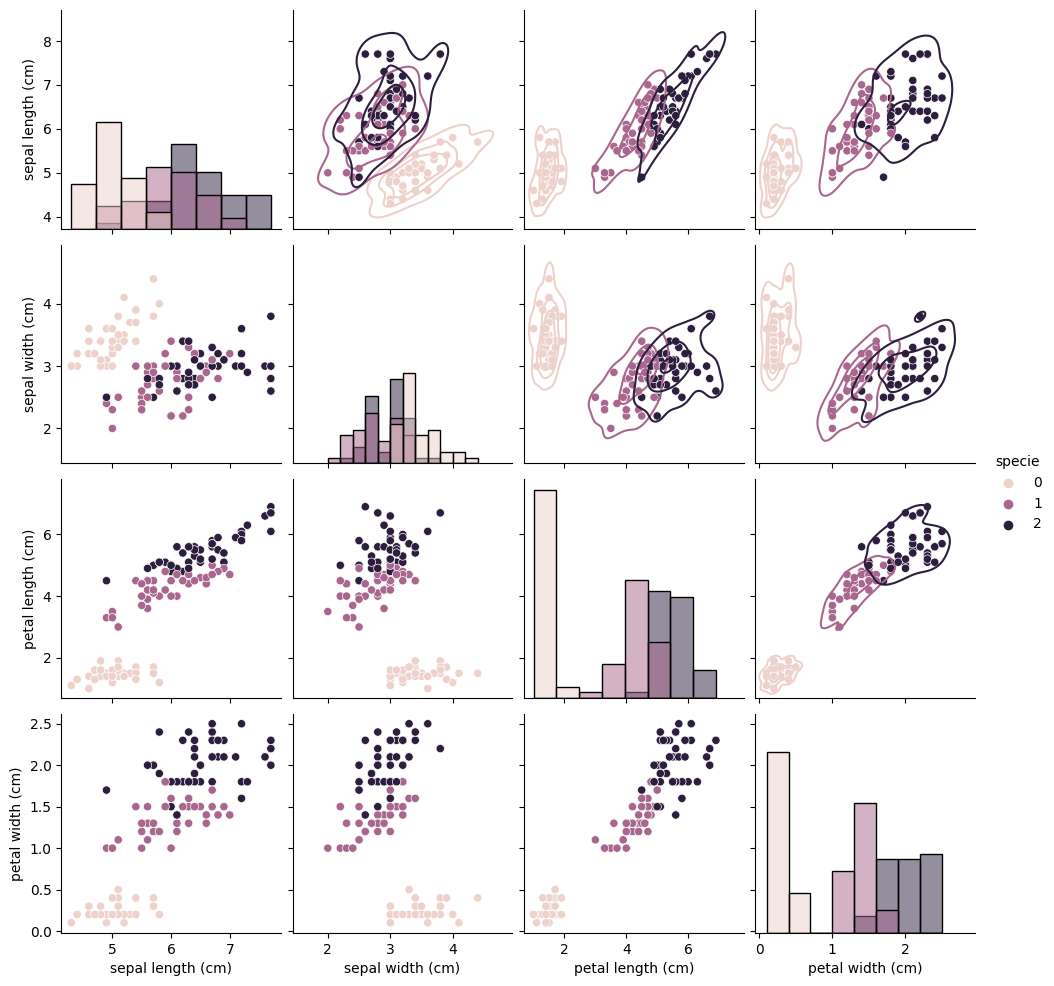

In [27]:
pplot = sns.pairplot(data=df_train, diag_kind='hist', hue='specie')
pplot.map_upper(sns.kdeplot, levels=4)
plt.show()

In [28]:
df_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
sepal length (cm),1.000000,-0.160617,0.870767,0.817669,0.770898
sepal width (cm),-0.160617,1.000000,-0.467109,-0.396875,-0.461449
petal length (cm),0.870767,-0.467109,1.000000,0.960511,0.946008
petal width (cm),0.817669,-0.396875,0.960511,1.000000,0.954067
specie,0.770898,-0.461449,0.946008,0.954067,1.000000


In [29]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [30]:
model_xgb = XGBClassifier(randon_state=2137)
model_xgb.fit(X_train_sc, y_train)

[02:47:17] WARNING: ../src/learner.cc:767: 
Parameters: { "randon_state" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [32]:
y_hat = model_xgb.predict(X_test_sc)
print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")

Accuracy: 0.97


In [35]:
type(X_test)

pandas.core.frame.DataFrame

In [37]:
single_prediction = pd.DataFrame({'sepal length (cm)': [6.0], 'sepal width (cm)': [3.2], 'petal length (cm)': [2.5], 'petal width (cm)': [0.8]})
single_prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.0,3.2,2.5,0.8


In [38]:
single_p_sc = scaler.transform(single_prediction)
result = model_xgb.predict(single_p_sc)
result

array([1])